In [1]:
#!pip install tensorflow_model_optimization

import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, datasets, utils, callbacks, optimizers, losses
from keras.datasets import cifar10
import tensorflow_model_optimization as tfmot

2023-11-07 22:11:30.991752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 22:11:31.704413: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-11-07 22:11:31.704484: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-11-07 22:11:31.704493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] 

In [2]:
# Loading data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Transform
x_train = x_train.astype(np.float32) / 255.0
y_train = utils.to_categorical(y_train)
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean

x_test = x_test.astype(np.float32) / 255.0
y_test = utils.to_categorical(y_test)
x_test -= x_train_mean

In [3]:
# Connect to google drive to save/load model
# from google.colab import drive
# drive.mount('/content/drive')

### ResNet18

In [4]:
# # @title 기본 제목 텍스트
# kernel_initializer = 'he_normal'
# input_shape = (32,32,3)

# image_input = layers.Input(shape=input_shape)
# # first layer

# block1 = keras.Sequential([
#     layers.Conv2D(kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU()
# ])(image_input)

# # first stage
# shortcut = block1
# block2 = keras.Sequential([
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block1)

# block2 = layers.add([block2, shortcut])
# block2 = layers.ReLU()(block2)

# shortcut = block2
# block3 = keras.Sequential([
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block2)

# block3 = layers.add([block3, shortcut])
# block3 = layers.ReLU()(block3)

# # second stage
# shortcut = keras.Sequential([layers.Conv2D(filters=128, kernel_size=1, strides=2),
#                              layers.BatchNormalization()])(block3)
# block4 = keras.Sequential([
#     layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block3)

# block4 = layers.add([block4, shortcut])
# block4 = layers.ReLU()(block4)

# shortcut = block4
# block5 = keras.Sequential([
#     layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block4)

# block5 = layers.add([block5, shortcut])
# block5 = layers.ReLU()(block5)

# # third stage
# shortcut = keras.Sequential([layers.Conv2D(filters=256, kernel_size=1, strides=2),
#                              layers.BatchNormalization()])(block5)
# block6 = keras.Sequential([
#     layers.Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block5)

# block6 = layers.add([block6, shortcut])
# block6 = layers.ReLU()(block6)

# shortcut = block6
# block7 = keras.Sequential([
#     layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block6)

# block7 = layers.add([block7, shortcut])
# block7 = layers.ReLU()(block7)

# #fourth stage
# shortcut = keras.Sequential([layers.Conv2D(filters=512, kernel_size=1, strides=2),
#                              layers.BatchNormalization()])(block7)
# block8 = keras.Sequential([
#     layers.Conv2D(filters=512, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block7)

# block8 = layers.add([block8, shortcut])
# block8 = layers.ReLU()(block8)

# shortcut = block8
# block9 = keras.Sequential([
#     layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block8)

# block9 = layers.add([block9, shortcut])
# block9 = layers.ReLU()(block9)

# predictions = keras.Sequential([
#     layers.GlobalAveragePooling2D(),
#     layers.Flatten(),
#     layers.Dense(10)
# ])(block9)

# model = keras.Model(inputs=image_input, outputs=predictions)

In [5]:
## Applying bottleneck
def bottleneck_block(input, filters=64, expansion=1, stride=1):
    x = layers.Conv2D(filters, (1, 1), padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # x = layers.Conv2D(filters, (3, 3), padding='same', strides=stride)(x)
    x = layers.DepthwiseConv2D(3, padding='same', strides=stride)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters*expansion, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    if (stride == 2 or expansion==4):
        input = layers.Conv2D(filters*expansion, (1, 1), padding='same', strides=stride)(input)
        input = layers.BatchNormalization()(input)

    x = layers.Add()([x, input])
    x = layers.ReLU()(x)
    return x

kernel_initializer = 'he_normal'
input_shape = (32,32,3)

image_input = layers.Input(shape=input_shape)
# first layer
x = keras.Sequential([
    layers.Conv2D(kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU()
])(image_input)

# first stage
x = bottleneck_block(x, filters=64, expansion=1, stride=1)
x = bottleneck_block(x, filters=64, expansion=1, stride=1)
# second stage
x = bottleneck_block(x, filters=128, expansion=1, stride=2)
x = bottleneck_block(x, filters=128, expansion=1, stride=1)
# Third stage
x = bottleneck_block(x, filters=256, expansion=1, stride=2)
x = bottleneck_block(x, filters=256, expansion=1, stride=1)
# Fourth stage
x = bottleneck_block(x, filters=512, expansion=1, stride=2)
x = bottleneck_block(x, filters=512, expansion=1, stride=1)

predictions = keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512),
    layers.Dense(10)
])(x)

model = keras.Model(inputs=image_input, outputs=predictions)

# Total parameters
model.summary()

2023-11-07 22:11:33.328151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 22:11:33.333280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 22:11:33.333746: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 22:11:33.334394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32, 32, 64)   2048        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   4160        ['sequential[0][0]']             
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_1[0][0]']               
 rmalization)                                                                                 

In [6]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 30, mode = 'auto')
from keras.callbacks import ModelCheckpoint

save_dir = './drive/MyDrive/colab_data/'
checkpoint = ModelCheckpoint(save_dir+"best_model", monitor="val_accuracy", save_best_only=True, mode='auto')
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(
          x_train,
          y_train,
          epochs=200,
          validation_split=0.1,
          callbacks = [checkpoint])

# Best Validation Accuracy
print("Best Validation Accuracy:{:.4f}".format(max(hist.history['val_accuracy'])))

Epoch 1/200


2023-11-07 22:11:42.348291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-11-07 22:11:43.171165: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6800014490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-07 22:11:43.171208: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-11-07 22:11:43.176914: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-07 22:11:43.406086: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 [==============================] - ETA: 0s - loss: 1.4880 - accuracy: 0.4811

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 53s 25ms/step - loss: 1.4880 - accuracy: 0.4811 - val_loss: 1.4703 - val_accuracy: 0.4986
Epoch 2/200
1406/1407 [============================>.] - ETA: 0s - loss: 0.9433 - accuracy: 0.6673

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 33s 24ms/step - loss: 0.9434 - accuracy: 0.6673 - val_loss: 1.0638 - val_accuracy: 0.6522
Epoch 3/200
1406/1407 [============================>.] - ETA: 0s - loss: 0.7277 - accuracy: 0.7469

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 33s 24ms/step - loss: 0.7277 - accuracy: 0.7469 - val_loss: 0.7769 - val_accuracy: 0.7470
Epoch 4/200
1405/1407 [============================>.] - ETA: 0s - loss: 0.5979 - accuracy: 0.7915

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 33s 24ms/step - loss: 0.5980 - accuracy: 0.7915 - val_loss: 0.6553 - val_accuracy: 0.7844
Epoch 5/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.4966 - accuracy: 0.8260 - val_loss: 0.6989 - val_accuracy: 0.7778
Epoch 6/200
1405/1407 [============================>.] - ETA: 0s - loss: 0.4110 - accuracy: 0.8574

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 33s 24ms/step - loss: 0.4110 - accuracy: 0.8574 - val_loss: 0.6633 - val_accuracy: 0.7848
Epoch 7/200
1404/1407 [============================>.] - ETA: 0s - loss: 0.3343 - accuracy: 0.8826

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.3342 - accuracy: 0.8827 - val_loss: 0.6123 - val_accuracy: 0.8130
Epoch 8/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2756 - accuracy: 0.9035 - val_loss: 0.7186 - val_accuracy: 0.7956
Epoch 9/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2325 - accuracy: 0.9184 - val_loss: 0.6587 - val_accuracy: 0.8106
Epoch 10/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1887 - accuracy: 0.9334 - val_loss: 0.7989 - val_accuracy: 0.7972
Epoch 11/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1622 - accuracy: 0.9430 - val_loss: 0.7549 - val_accuracy: 0.8034
Epoch 12/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1454 - accuracy: 0.9475 - val_loss: 0.8242 - val_accuracy: 0.8034
Epoch 13/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1331 - accuracy: 0.9540 - val_loss: 0.9062 - 

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.1087 - accuracy: 0.9621 - val_loss: 0.7798 - val_accuracy: 0.8216
Epoch 16/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1054 - accuracy: 0.9639 - val_loss: 0.8297 - val_accuracy: 0.8156
Epoch 17/200
1407/1407 [==============================] - ETA: 0s - loss: 0.0895 - accuracy: 0.9686

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0895 - accuracy: 0.9686 - val_loss: 0.7750 - val_accuracy: 0.8276
Epoch 18/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0925 - accuracy: 0.9669 - val_loss: 0.9702 - val_accuracy: 0.8036
Epoch 19/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0815 - accuracy: 0.9719 - val_loss: 0.7999 - val_accuracy: 0.8198
Epoch 20/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0774 - accuracy: 0.9735 - val_loss: 0.8142 - val_accuracy: 0.8216
Epoch 21/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0781 - accuracy: 0.9733 - val_loss: 0.8510 - val_accuracy: 0.8226
Epoch 22/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0718 - accuracy: 0.9750 - val_loss: 0.8410 - val_accuracy: 0.8266
Epoch 23/200
1404/1407 [============================>.] - ETA: 0s - loss: 0.0673 - accuracy: 0.9760

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0678 - accuracy: 0.9758 - val_loss: 0.8430 - val_accuracy: 0.8292
Epoch 24/200
1405/1407 [============================>.] - ETA: 0s - loss: 0.0670 - accuracy: 0.9776

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0671 - accuracy: 0.9776 - val_loss: 0.8124 - val_accuracy: 0.8330
Epoch 25/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0616 - accuracy: 0.9788 - val_loss: 0.8820 - val_accuracy: 0.8302
Epoch 26/200
1404/1407 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9808

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0574 - accuracy: 0.9808 - val_loss: 0.8127 - val_accuracy: 0.8352
Epoch 27/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0560 - accuracy: 0.9808 - val_loss: 0.8628 - val_accuracy: 0.8288
Epoch 28/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0584 - accuracy: 0.9804 - val_loss: 0.8806 - val_accuracy: 0.8242
Epoch 29/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0530 - accuracy: 0.9814 - val_loss: 0.8882 - val_accuracy: 0.8294
Epoch 30/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0478 - accuracy: 0.9839 - val_loss: 1.0185 - val_accuracy: 0.8112
Epoch 31/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0501 - accuracy: 0.9828 - val_loss: 0.8869 - val_accuracy: 0.8280
Epoch 32/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.8453 

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0434 - accuracy: 0.9848 - val_loss: 0.9154 - val_accuracy: 0.8358
Epoch 37/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0401 - accuracy: 0.9863 - val_loss: 0.9750 - val_accuracy: 0.8258
Epoch 38/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.9203 - val_accuracy: 0.8296
Epoch 39/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0396 - accuracy: 0.9866 - val_loss: 1.0175 - val_accuracy: 0.8224
Epoch 40/200
1406/1407 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9868

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.8694 - val_accuracy: 0.8414
Epoch 41/200
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.9116 - val_accuracy: 0.8356
Epoch 42/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0357 - accuracy: 0.9874 - val_loss: 0.8983 - val_accuracy: 0.8392
Epoch 43/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.8927 - val_accuracy: 0.8400
Epoch 44/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.9362 - val_accuracy: 0.8392
Epoch 45/200
1406/1407 [============================>.] - ETA: 0s - loss: 0.0378 - accuracy: 0.9868

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0378 - accuracy: 0.9868 - val_loss: 0.8889 - val_accuracy: 0.8424
Epoch 46/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.9743 - val_accuracy: 0.8344
Epoch 47/200
1406/1407 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9880

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0354 - accuracy: 0.9880 - val_loss: 0.8577 - val_accuracy: 0.8444
Epoch 48/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0337 - accuracy: 0.9886 - val_loss: 0.9165 - val_accuracy: 0.8352
Epoch 49/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0237 - accuracy: 0.9911 - val_loss: 0.9838 - val_accuracy: 0.8414
Epoch 50/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0330 - accuracy: 0.9887 - val_loss: 1.0441 - val_accuracy: 0.8248
Epoch 51/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0287 - accuracy: 0.9902 - val_loss: 1.0203 - val_accuracy: 0.8374
Epoch 52/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.9123 - val_accuracy: 0.8396
Epoch 53/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 1.0208 

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 1.0370 - val_accuracy: 0.8448
Epoch 83/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 1.1162 - val_accuracy: 0.8432
Epoch 84/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 1.0828 - val_accuracy: 0.8442
Epoch 85/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 1.1513 - val_accuracy: 0.8344
Epoch 86/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 1.0414 - val_accuracy: 0.8392
Epoch 87/200
1405/1407 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9952

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 1.0528 - val_accuracy: 0.8482
Epoch 88/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 1.1523 - val_accuracy: 0.8378
Epoch 89/200
1407/1407 [==============================] - 25s 17ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 1.0297 - val_accuracy: 0.8456
Epoch 90/200
1406/1407 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9945

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0155 - accuracy: 0.9945 - val_loss: 1.0186 - val_accuracy: 0.8490
Epoch 91/200
1404/1407 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9932

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.9956 - val_accuracy: 0.8502
Epoch 92/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 1.0561 - val_accuracy: 0.8468
Epoch 93/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 1.0460 - val_accuracy: 0.8486
Epoch 94/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 1.1224 - val_accuracy: 0.8428
Epoch 95/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 1.1868 - val_accuracy: 0.8312
Epoch 96/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 1.1483 - val_accuracy: 0.8412
Epoch 97/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 1.1377 

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 25ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 1.1018 - val_accuracy: 0.8514
Epoch 108/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 1.1457 - val_accuracy: 0.8402
Epoch 109/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 1.2495 - val_accuracy: 0.8310
Epoch 110/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 1.2522 - val_accuracy: 0.8432
Epoch 111/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0135 - accuracy: 0.9951 - val_loss: 1.2892 - val_accuracy: 0.8394
Epoch 112/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 1.2674 - val_accuracy: 0.8368
Epoch 113/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 1

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 1.2049 - val_accuracy: 0.8530
Epoch 154/200
1405/1407 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9980

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 1.2006 - val_accuracy: 0.8534
Epoch 155/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 1.3910 - val_accuracy: 0.8418
Epoch 156/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 1.2536 - val_accuracy: 0.8492
Epoch 157/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 1.3326 - val_accuracy: 0.8452
Epoch 158/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 1.2225 - val_accuracy: 0.8474
Epoch 159/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 1.2803 - val_accuracy: 0.8442
Epoch 160/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 1

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 1.2677 - val_accuracy: 0.8544
Epoch 186/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 1.2579 - val_accuracy: 0.8462
Epoch 187/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 1.2739 - val_accuracy: 0.8470
Epoch 188/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 1.2913 - val_accuracy: 0.8482
Epoch 189/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 1.2930 - val_accuracy: 0.8446
Epoch 190/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 1.3261 - val_accuracy: 0.8474
Epoch 191/200
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 1

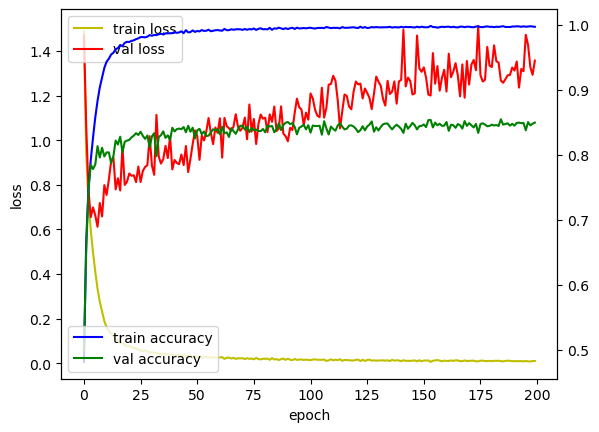

In [7]:
#plot training
# %matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [8]:
load_dir = './drive/MyDrive/colab_data/'
model_best = keras.models.load_model(load_dir+'best_model')

In [9]:
# from tensorflow import keras
# import tensorflow as tf
# import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
validation_split = 0.1 # 10% of training set will be used for validation set.

num_images = x_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model_best, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model_for_pruning.summary()
save_dir = './drive/MyDrive/colab_data/'
checkpoint = ModelCheckpoint(save_dir+"pruned_model", save_best_only=False)

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=save_dir),
  checkpoint
]

hist_prune = model_for_pruning.fit(x_train, y_train,
                  batch_size = batch_size,
                  epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

# Best Validation Accuracy
print("Best Validation Accuracy(Prunned):{:.4f}".format(max(hist_prune.history['val_accuracy'])))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/20
   5/1407 [..............................] - ETA: 41s - loss: 0.0024 - accuracy: 1.0000    WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0272s vs `on_train_batch_end` time: 0.1102s). Check your callbacks.


1407/1407 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9942

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 143s 55ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 1.2619 - val_accuracy: 0.8436
Epoch 2/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9954

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 77s 55ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 1.3334 - val_accuracy: 0.8326
Epoch 3/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9946

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 77s 55ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 1.2694 - val_accuracy: 0.8378
Epoch 4/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9945

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 77s 55ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 1.1578 - val_accuracy: 0.8418
Epoch 5/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9938

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 1.2025 - val_accuracy: 0.8382
Epoch 6/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9936

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 77s 55ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 1.1707 - val_accuracy: 0.8398
Epoch 7/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9930

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 56ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 1.1401 - val_accuracy: 0.8382
Epoch 8/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9931

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 1.1979 - val_accuracy: 0.8316
Epoch 9/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9928

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 1.1362 - val_accuracy: 0.8386
Epoch 10/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9926

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0211 - accuracy: 0.9926 - val_loss: 1.1452 - val_accuracy: 0.8364
Epoch 11/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9928

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 79s 56ms/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 1.1755 - val_accuracy: 0.8332
Epoch 12/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9936

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 1.1863 - val_accuracy: 0.8348
Epoch 13/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9940

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 56ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 1.1812 - val_accuracy: 0.8376
Epoch 14/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9938

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 1.1862 - val_accuracy: 0.8324
Epoch 15/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9956

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 77s 55ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 1.2073 - val_accuracy: 0.8350
Epoch 16/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9954

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 56ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 1.2469 - val_accuracy: 0.8364
Epoch 17/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9965

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 77s 55ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 1.2272 - val_accuracy: 0.8402
Epoch 18/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9957

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 56ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 1.2623 - val_accuracy: 0.8426
Epoch 19/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9970

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 55ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 1.4814 - val_accuracy: 0.8230
Epoch 20/20
1407/1407 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9965

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 78s 56ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 1.2680 - val_accuracy: 0.8386
Best Validation Accuracy(Prunned):0.8436


In [10]:
# Total parameters after prune
load_dir = './drive/MyDrive/colab_data/'
pruned_model = tf.keras.models.load_model(load_dir+"pruned_model")

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
model_for_export.summary()

pruned_weights = model_for_export.get_weights()

# print sparsity
total_count = 0
total_nonzero = 0

for i, weights in enumerate(pruned_weights):
    if len(weights) > 0:
        weight_matrix = np.array(weights[0])
        non_zero_count = np.count_nonzero(weight_matrix)
        layer_count = np.prod(weight_matrix.shape)
        sparsity = 1.0 - (non_zero_count / layer_count)
        # print(f"Layer {i:>2d}: Sparsity = {sparsity:.4f}")
        total_count = total_count + layer_count
        total_nonzero = total_nonzero + non_zero_count

total_sparsity = 1.0 - (total_nonzero / total_count)
print(f"Total Sparsity: {total_sparsity:.4f}")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32, 32, 64)   2048        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   4160        ['sequential[0][0]']             
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_1[1][0]']               
 rmalization)                                                                                 

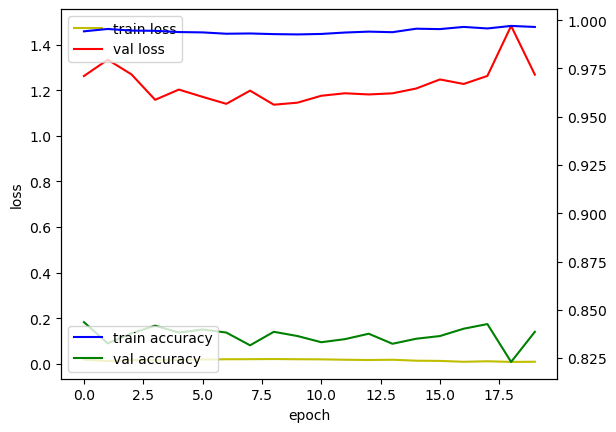

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_prune.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist_prune.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist_prune.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist_prune.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()